# [Lab Session 3](fourier.ipynb)


In [99]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [100]:
cell_img = plt.imread('data/cells.png')
cell_img.resize(256, 256)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [101]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype
print(cell_ft)


[[11685.81206986   +0.j           221.81293616+1929.3298152j
    453.94366721 +893.59699332j ...   147.80395428 -741.65769559j
    453.94366721 -893.59699332j   221.81293616-1929.3298152j ]
 [  640.65369518+1743.27501325j  -468.32903475  +11.6059259j
   -134.38933485 +144.89419543j ...    80.21990743 +793.66307135j
  -1116.77408501 +120.6375587j    167.25766634 -366.89397839j]
 [   38.3429718  +968.67376955j  -271.75873723  -91.48240371j
   -129.22335712 -250.70253948j ...  -145.85923315 -332.9757022j
    -57.56715282 -235.76837929j   439.44348519  -15.04998787j]
 ...
 [  -12.16817252 -853.5050427j    165.4361805  -101.96027274j
   -218.26727819  -28.30771319j ...  -163.93743719  -85.00974182j
   -246.50978438  +31.85212838j  -142.09256992 -253.20664124j]
 [   38.3429718  -968.67376955j   439.44348519  +15.04998787j
    -57.56715282 +235.76837929j ...   -28.69301166 +222.9923923j
   -129.22335712 +250.70253948j  -271.75873723  +91.48240371j]
 [  640.65369518-1743.27501325j   167.257666

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [102]:
print(cell_ft.real)
print(cell_ft.imag)

amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
print(amplitude)
print(phase)

[[11685.81206986   221.81293616   453.94366721 ...   147.80395428
    453.94366721   221.81293616]
 [  640.65369518  -468.32903475  -134.38933485 ...    80.21990743
  -1116.77408501   167.25766634]
 [   38.3429718   -271.75873723  -129.22335712 ...  -145.85923315
    -57.56715282   439.44348519]
 ...
 [  -12.16817252   165.4361805   -218.26727819 ...  -163.93743719
   -246.50978438  -142.09256992]
 [   38.3429718    439.44348519   -57.56715282 ...   -28.69301166
   -129.22335712  -271.75873723]
 [  640.65369518   167.25766634 -1116.77408501 ...  -435.62992224
   -134.38933485  -468.32903475]]
[[    0.          1929.3298152    893.59699332 ...  -741.65769559
   -893.59699332 -1929.3298152 ]
 [ 1743.27501325    11.6059259    144.89419543 ...   793.66307135
    120.6375587   -366.89397839]
 [  968.67376955   -91.48240371  -250.70253948 ...  -332.9757022
   -235.76837929   -15.04998787]
 ...
 [ -853.5050427   -101.96027274   -28.30771319 ...   -85.00974182
     31.85212838  -253.20664124]


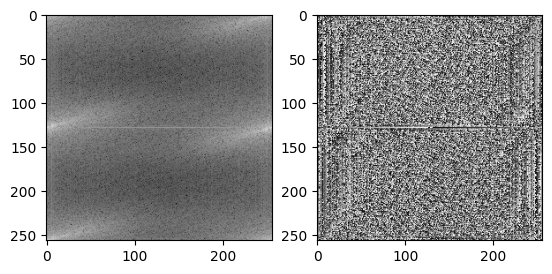

In [103]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


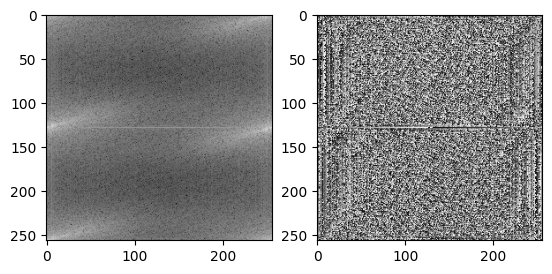

In [104]:
shift_cell_ft = np.fft.fftshift(cell_ft)

shift_amplitude = np.abs(cell_ft)
shift_phase = np.angle(cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(shift_phase, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


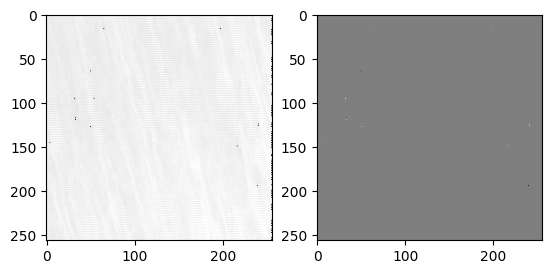

In [105]:
#inverse fourier mit geshiftetem Bild ohne Rückshiftung 
#backshift_cell_ft = np.fft.ifftshift(shift_cell_ft)

#inverse_shift_cell_ft = np.fft.ifft2(backshift_cell_ft)

#inverse_shift_amplitude = np.abs(inverse_shift_cell_ft)
#inverse_shift_phase = np.angle(inverse_shift_cell_ft)


#auf Ursprungsbild 
inverse_cell_ft = np.fft.ifft2(cell_ft)

amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(inverse_shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(inverse_shift_phase, 'gray')


---


**[Task 2 (a).]()** Load the brain CT image.


In [106]:
ct_img = plt.imread('/workspaces/mobi-fs5-python/data/brain_ct.png')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [107]:
ct_ft = np.fft.fft2(ct_img)

ct_amplitude = np.abs(ct_ft)
ct_phase = np.angle(ct_ft)

shift_ct_ft = np.fft.fftshift(ct_ft)

shift_ct_amplitude = np.abs(ct_ft)
shift_ct_phase = np.angle(ct_ft)


In [108]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [109]:
#gehirn
c_array_ct = to_complex_array(ct_amplitude, ct_phase)
print(c_array_ct)

[[15684.58865412   +0.j         -5119.53936371+1229.08078733j
  -2000.94953866 -295.35150207j ...   -24.57606924 -465.55197989j
  -2000.94953866 +295.35150207j -5119.53936371-1229.08078733j]
 [-4257.29458937 +343.38812228j  1016.30020887  -24.84867225j
    688.45964518 -634.0130996j  ...   353.5266442  +392.73145938j
   -594.32699015-1053.26301158j  1019.13891546+1569.46921305j]
 [-1082.57465369+2410.85593661j   870.90585489  -81.71018917j
   -215.54714148 -884.92125437j ...  -286.45668649  +99.88732199j
   1343.19131382 -300.61410194j   -54.92285489-1892.28102676j]
 ...
 [ -129.0056972   -84.16425195j   735.98624859 -118.49654149j
   -762.69479604 -171.81493014j ...   110.88181052  -86.70779076j
    543.37757814 +177.27816722j  -305.56122684 +253.35966216j]
 [-1082.57465369-2410.85593661j   -54.92285489+1892.28102676j
   1343.19131382 +300.61410194j ...   -73.59583913 -117.06893669j
   -215.54714148 +884.92125437j   870.90585489  +81.71018917j]
 [-4257.29458937 -343.38812228j  1019.13

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [110]:
#amplitude von zelle, andere gehirn
c_array_ct = to_complex_array(amplitude, ct_phase)
print(c_array_ct)

[[11685.81206986  +0.j         -1888.38106062+453.3558033j
   -991.54420344-146.35754885j ...   -39.86583151-755.1906129j
   -991.54420344+146.35754885j -1888.38106062-453.3558033j ]
 [-1851.25591479+149.32001512j   468.33285333 -11.45079916j
    145.37051608-133.87394909j ...   533.69477364+592.87957712j
   -552.01270244-978.27386445j   219.59623707+338.17718876j]
 [ -397.11583288+884.36308753j   285.48974143 -26.78523821j
    -66.74877054-274.03474407j ...  -343.25156639+119.6916719j
    236.83570725 -53.00522175j   -12.75681303-439.51603216j]
 ...
 [ -714.90118216-466.40671316j   191.86143349 -30.8904091j
   -214.71451655 -48.36949177j ...   145.47079667-113.75582109j
    236.30104774 +77.09375275j  -223.51196421+185.32755718j]
 [ -397.11583288-884.36308753j   -12.75681303+439.51603216j
    236.83570725 +53.00522175j ...  -119.65980958-190.34291664j
    -66.74877054+274.03474407j   285.48974143 +26.78523821j]
 [-1851.25591479-149.32001512j   219.59623707-338.17718876j
   -552.012702

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [111]:
filter_window_size = 50

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


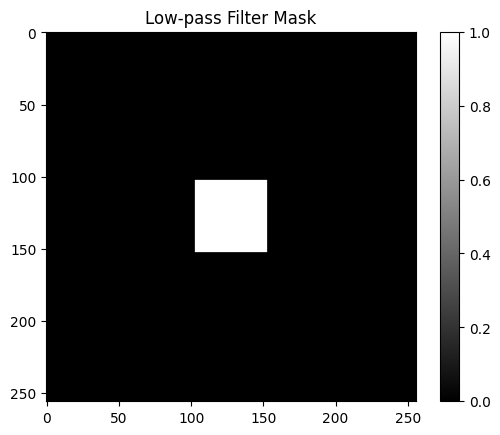

In [112]:
array_zeros = np.zeros(np.shape(ct_img))
print(array_zeros)
array_zeros.shape

# Example image shape (e.g., 256x256)
image_shape = (256, 256)

# Low-pass filter size (for example, 50x50 centered)
filter_window_size = 50

# Create an array of zeros (the array_zeros)
array_zeros = np.zeros(image_shape)

# Define the center coordinates
center_x, center_y = image_shape[0] // 2, image_shape[1] // 2

# Define the half size of the filter window
half_filter_size = filter_size // 2

# Insert the rectangle of ones at the center
array_zeros[center_x - half_filter_size:center_x + half_filter_size,
     center_y - half_filter_size:center_y + half_filter_size] = 1

# Display the array_zeros
plt.imshow(array_zeros, cmap='gray')
plt.title("Low-pass Filter Mask")
plt.colorbar()
plt.show()

**[Task 3 (b).]()** Create a highpass filter maks.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


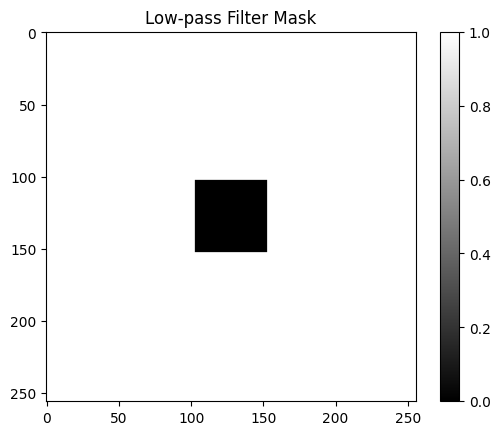

In [113]:
array_zeros = np.zeros(np.shape(ct_img))
print(array_zeros)
array_zeros.shape

# Example image shape (e.g., 256x256)
image_shape = (256, 256)

# Low-pass filter size (for example, 50x50 centered)
filter_window_size = 50

# Create an array of zeros (the array_zeros)
array_zeros = np.zeros(image_shape)

# Define the center coordinates
center_x, center_y = image_shape[0] // 2, image_shape[1] // 2

# Define the half size of the filter window
half_filter_size = filter_size // 2

# Insert the rectangle of ones at the center
array_zeros[center_x - half_filter_size:center_x + half_filter_size,
     center_y - half_filter_size:center_y + half_filter_size] = 1

# Display the array_zeros
high_pass_filter = 1 - array_zeros
plt.imshow(high_pass_filter, cmap='gray')
plt.title("Low-pass Filter Mask")
plt.colorbar()
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_1385/1607874500.py:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_pass_ct_amplitude), 'gray')
/tmp/ipykernel_1385/1607874500.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_pass_ct_amplitude), 'gray')


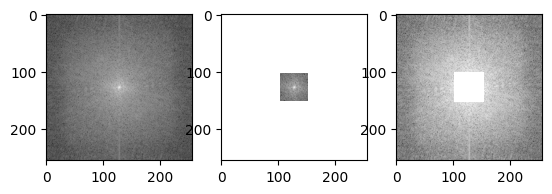

In [114]:
shift_ct_amplitude = np.abs(ct_ft)

shift_ct_ft = np.fft.fftshift(ct_ft)

shift_ct_amplitude = np.abs(shift_ct_ft)

low_pass_ct_amplitude = shift_ct_amplitude * array_zeros
high_pass_ct_amplitude = shift_ct_amplitude * high_pass_filter

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(np.log(shift_ct_amplitude), 'gray')


plt.subplot(1, 3, 2)
plt.imshow(np.log(low_pass_ct_amplitude), 'gray')


plt.subplot(1, 3, 3)
plt.imshow(np.log(high_pass_ct_amplitude), 'gray')


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


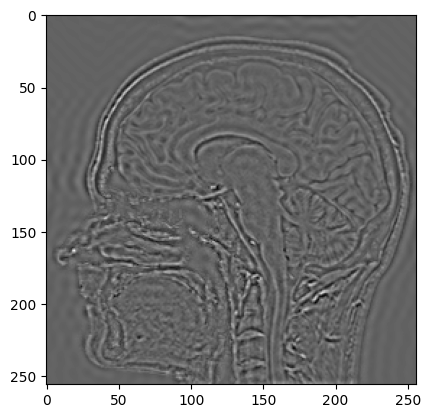

In [117]:
#low pass
#Bild geshiftet und dann amplitude extrahiert
shift_ct_ft = np.fft.fftshift(ct_ft)
shift_ct_phase = np.angle(shift_ct_ft)

#array daraus machen 
low_pass_rev = to_complex_array(low_pass_ct_amplitude, shift_ct_phase)

#backshift
backshift_low_pass = np.fft.ifftshift(low_pass_rev)
rev_ft_low_pass = np.fft.ifft2(backshift_low_pass)
rev_ft_low_pass_real = rev_ft_low_pass.real
plt.imshow(rev_ft_low_pass_real, 'gray')

#high pass
high_pass_rev = to_complex_array(high_pass_ct_amplitude, shift_ct_phase)
backshift_high_pass = np.fft.ifftshift(high_pass_rev)
rev_ft_high_pass = np.fft.ifft2(backshift_high_pass)
rev_ft_high_pass_real = rev_ft_high_pass.real
plt.imshow(rev_ft_high_pass_real, 'gray')


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
